# $$\underline{\textbf{Image processing exercise}}$$

### $\textbf{Install OpenCV  libraries}$

In [ ]:
!pip install opencv-python 

### $\textbf{Import packages}$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 

### (i). $\textbf{Reading the image}$

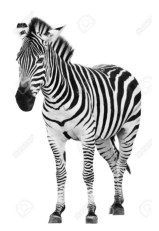

In [3]:
pic = cv2.imread('zebra.jpg')
cv2.imshow('mat',pic)
plt.axis('off')
plt.imshow(pic)

###  ii. $\textbf{Convert the colored image into a gray level image}$

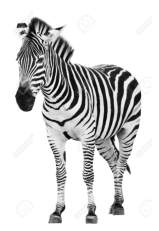

In [4]:
gray= cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
plt.axis('off')
#cv2.imshow('Grayscale',gray)
plt.imshow(gray,cmap='gray')

### iii. $\textbf{Number of unique elements in image matrix from (ii)}$

In [5]:
A = np.array(gray)
len(np.unique(A))

256

### iv. $\textbf{Perform the SVD on the image-matrix of the gray-level image}$

In [6]:
from scipy.linalg import svd #import the singular value decomposition from scipy.linalg
U,s,V_transp = svd(A, full_matrices=False) #By using full_matrix, we just care about the columns of U which correspond to the non-zeros element of the singular matrix.
# Doing this operation does not affect the quality of the image.
print(U)
print(s)
print(V_transp)

[[-3.37918997e-02 -4.00117878e-03 -1.33654615e-02 ... -5.97201800e-03
  -8.71008355e-03  6.76648021e-01]
 [-3.37939784e-02 -4.00127843e-03 -1.33658005e-02 ...  3.65182199e-02
  -2.75355969e-02  2.27807388e-01]
 [-3.37927565e-02 -4.00132360e-03 -1.33653507e-02 ... -8.64560716e-03
  -2.73462106e-02  5.29774614e-02]
 ...
 [-3.32856700e-02 -6.59640762e-04 -1.56911388e-02 ... -2.48373672e-02
  -1.69385113e-02 -1.30752362e-02]
 [-3.37362550e-02 -3.75189027e-03 -1.35765690e-02 ... -3.36599723e-02
  -2.47588512e-02 -1.93953961e-02]
 [-3.37386914e-02 -3.87098407e-03 -1.35598760e-02 ... -3.46660689e-02
  -2.54397281e-02 -1.99280661e-02]]
[2.20401234e+05 3.41569648e+04 2.58828906e+04 1.81837500e+04
 1.67082441e+04 1.57028281e+04 1.35914189e+04 1.29557520e+04
 1.18490732e+04 1.11034736e+04 1.07702314e+04 1.03374463e+04
 1.00923887e+04 9.78570312e+03 9.53455078e+03 9.33027930e+03
 9.00771387e+03 8.82567676e+03 8.27759863e+03 8.03891553e+03
 7.96416553e+03 7.73110254e+03 7.08957422e+03 6.92312793e+0

### v. $\textbf{Approximation of gray level image matrix by its SVD taking different numbers of
singular values to display the 30%, 50%, 80% compressions of the image, respectively}$

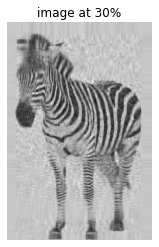

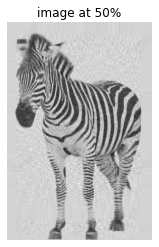

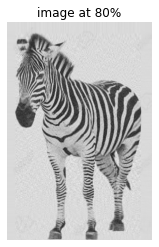

In [13]:
D = np.diag(s)
j=0
for i in (30,50,80):
# Construction of approximate image-matrix
    gray_approx = U[:,:i]@D[0:i,:i]@V_transp[:i,:] # gray_approx is the approximative gray scale image matrix
#Plotting 
    plt.figure(j+1)
    j=j+1
    plt.axis('off')
    plt.title('image' + ' ' + 'at'+' '+ str(i)+ '%')
    plt.imshow(gray_approx,cmap='gray')

# $$\underline{\textbf{Rosenbrock function exercise}}$$

Let $f$ be the Rosenbrock function defined from $\mathbb{R}^n$ to $\mathbb{R}$ such that:

\begin{equation} 
f(x) = \sum_{i=1}^{n-1}\left[100 (x_{i+1}-x_{i}^2)^2 + (1-x_{i})^2\right]
\end{equation}

### $\textbf{Import torch}$

In [17]:
import torch 

### 1. $\textbf{define f(x) under the PyTorch machine learning framework}$

In [18]:
def f(x,n):
    y=0
    for i in range (0,n-1):
        y = y + 100*(x[i+1]-x[i]**2)**2 + (1-x[i])**2
    return y

In [ ]:
torch.tensor?

### 2. $\textbf{Write a Python function to compute the gradient of this function for n = 10 using the
Automatic differentiation toolbox under PyTorch}$

In [19]:
def g(x):
    f(x,10).backward()
    return x.grad

### 3. $\textbf{Evaluate the gradient at the point x= (1,1,....1)} \in \mathbb{R}^{10}$

In [20]:
x=torch.tensor([1.0,1,1,1,1,1,1,1,1,1],requires_grad=True)
g(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 3. $\textbf{web search:}$
1. What is google matrix?

$\textbf{A google matrix}$ is a particular stochastic matrix that is used by Google's PageRank Algorithm. By the way, a stochastic matrix is a squared matrix for which each entry is a non negative real number representing a probability. It means that each entry of the google matrix represents a probability and this probability is related to the PageRank Algorithm. However, before moving on what it PageRank algorithm, we need to understand the concept of Page Ranking.

2. What is page Ranking? (Theoretical and in term of matrix)

Theoretically, $\textbf{page ranking}$ is the measure of how important a page web is. Therefore, we understand how google povides us with results based on what we are asking. When we do a research on google, the results are given by other of the best one. The first result that is showed is the best result of the research because it is located in the most famous web site that people used usually for their research. so, Google use the concept of Page Ranking to filter information and provide best ones.

In terms of matrix, the page ranking concept is using google matrix. The column vector of the matrix describes the links of a specific web page. The values inside the vectors represent the probability to reach another web page directly related to the previous webpage which was the first choice.

### 4. $\textbf{How does Netflix use the Singular Value Decomposition? Elaborate? What are "recommender
systems" and "collaborative filtering" (in the perspective of Matrix Algebra)}$

1. Netflix and the Singular Value Decomposition.

$\textbf{Netflix}$ is a streaming service that offers a large variety of movies, TV shows, documentaries, musics and many others services. Every day many people across the download whatever they are interested in on Netflix. If the user want to download something in music, Netflix will not show the other sevices that it offers, it will only show the data related to the servive $\textit{music}$ and will provide the user with its choice. In fact that is how, the $\textit{Singular Value Decomposition (SVD)}$ works when it comes to apply all the mathematic behind it to real-life situation like doing specific research on Netflix and get easily without suffering what we were expecting.

So, in conclusion, we can just say that Netflix uses SVD to provide the user with the best possible output based on its choice.

2. Recommender systems and collaborative filtering

$\textbf{Recommender systems}$ are those sytem built from some algorithms, that help users to fit with what their choice or with the type of service he is requesting from the system. They use Matrix factorization algorithms to decompose the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.

$\textbf{Collaborative filtering}$ use the matrix factorisation to find the relationship between the user and an item to do predictions based on its preferences

# $$\underline{\textbf{References}}$$

[1] Netflix-Watch TV Shows Online, Watch Movies, <<$\textit{https:www.netflix.com}$>>[$\textit{online}$], consulted on 13, Nov 2021

[2] Stochastic Matrix, <<$\textit{https://en.wikipedia.org/wiki/Stochastic_matrix}$>>,[$\textit{online}$], consulted on 13, Nov 2021

[3] S.Kahu, Reena Rahate, (2013), <<$\textit{Image compression using Singular Value Decomposition}$, International Journal of Advancements of Sciences and Technology, Vol.$\textbf{2}$, pp.244-248>>

[4] Matrix Factorization, <<$\textit{https://en.wikipedia.org/wiki/Stochastic_matrix}$>>,[$\textit{online}$], consulted on 13, Nov 2021